# Export JSON into XLSX format

In [2]:
import pandas as pd
import json
import glob
from openpyxl import load_workbook

# Find all typhoon JSON files
json_files = glob.glob("typhoon_predict_*.json")

for json_file in json_files:
    # Load JSON data
    with open(json_file, "r") as f:
        data = json.load(f)
    # Convert to DataFrame
    df = pd.DataFrame(data)
    # Export to Excel (same name, .xlsx extension)
    xlsx_file = json_file.replace(".json", ".xlsx")
    df.to_excel(xlsx_file, index=False)

    # Auto-adjust column widths
    wb = load_workbook(xlsx_file)
    ws = wb.active
    for column_cells in ws.columns:
        length = max(len(str(cell.value)) if cell.value is not None else 0 for cell in column_cells)
        ws.column_dimensions[column_cells[0].column_letter].width = length + 2
    wb.save(xlsx_file)

    print(f"Exported {json_file} to {xlsx_file} (auto-width columns)")

Exported typhoon_predict_pacific_ocean.json to typhoon_predict_pacific_ocean.xlsx (auto-width columns)
Exported typhoon_predict_philippine_sea.json to typhoon_predict_philippine_sea.xlsx (auto-width columns)
Exported typhoon_predict_south_china_sea.json to typhoon_predict_south_china_sea.xlsx (auto-width columns)


# Chi2 Test

In [1]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load your Excel file
df = pd.read_excel("typhoon_predict_pacific_ocean.xlsx")  # Change filename as needed

# Create a contingency table (e.g., region vs weather_main)
contingency_table = pd.crosstab(df["wind_gust"], df["wind_speed"])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi2 statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi2 statistic: 1023.0000000000001
p-value: 0.24078506886330642
Degrees of freedom: 992
Expected frequencies:
 [[0.03030303 0.03030303 0.03030303 ... 0.03030303 0.03030303 0.03030303]
 [0.03030303 0.03030303 0.03030303 ... 0.03030303 0.03030303 0.03030303]
 [0.03030303 0.03030303 0.03030303 ... 0.03030303 0.03030303 0.03030303]
 ...
 [0.03030303 0.03030303 0.03030303 ... 0.03030303 0.03030303 0.03030303]
 [0.03030303 0.03030303 0.03030303 ... 0.03030303 0.03030303 0.03030303]
 [0.03030303 0.03030303 0.03030303 ... 0.03030303 0.03030303 0.03030303]]


# Correlation Analysis

Correlation matrix:
            wind_speed  wind_gust
wind_speed    1.000000   0.942765
wind_gust     0.942765   1.000000


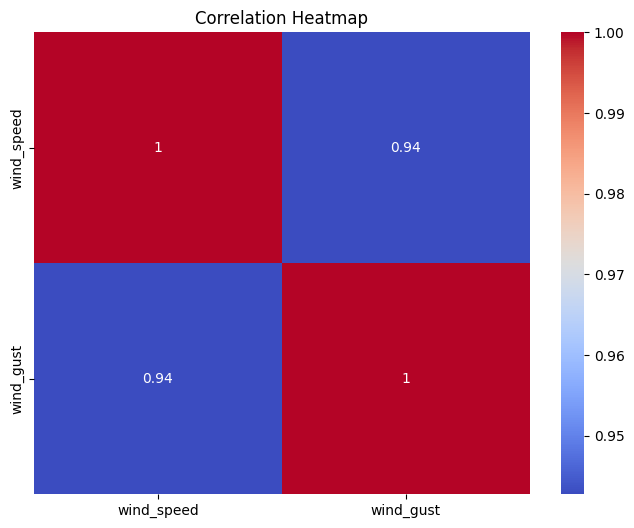

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your Excel file
df = pd.read_excel("typhoon_predict_pacific_ocean.xlsx")  # Change filename as needed

# Select only numerical columns for correlation
numerical_cols = ["wind_speed", "wind_gust"]
corr_matrix = df[numerical_cols].corr()

print("Correlation matrix:")
print(corr_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Pearson's r: 0.943
Spearman's rho: 0.951
Kendall's tau: 0.859


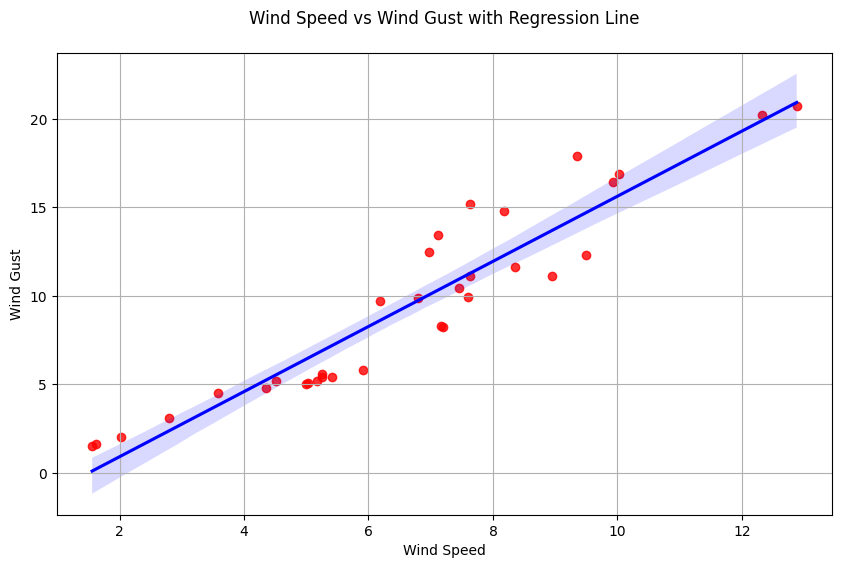

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your Excel file
df = pd.read_excel("typhoon_predict_pacific_ocean.xlsx")

# Calculate correlation coefficients
pearson_corr = df["wind_speed"].corr(df["wind_gust"], method="pearson")
spearman_corr = df["wind_speed"].corr(df["wind_gust"], method="spearman")
kendall_corr = df["wind_speed"].corr(df["wind_gust"], method="kendall")

print(f"Pearson's r: {pearson_corr:.3f}")
print(f"Spearman's rho: {spearman_corr:.3f}")
print(f"Kendall's tau: {kendall_corr:.3f}")

# Scatter plot with regression line (Pearson)
plt.figure(figsize=(10, 6))
sns.regplot(x="wind_speed", y="wind_gust", data=df, line_kws={"color": "blue"}, scatter_kws={"color": "red"})
plt.xlabel("Wind Speed")
plt.ylabel("Wind Gust")
plt.title("Wind Speed vs Wind Gust with Regression Line\n")
plt.grid(True)
plt.show()